## Install Packages

In [1]:
import pandas as pd
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from transformers import BertTokenizer, BertModel
from gensim.models import KeyedVectors #Word2Vec
from transformers import AutoTokenizer, AutoModel #Huggingface
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print("Device:", device)
import string 
import re
import time

Device: cuda


## Data Preprocessing

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def toclean_text(text):

    
    clean_text = [char for char in text if char not in string.punctuation]
   
    clean_text = ''.join(clean_text)
    
        
    return clean_text

In [5]:
train_data['clean_text'] = train_data['text'].apply(toclean_text)

In [6]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [7]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = r"[8:=;]"
    nose = r"['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = r"[8:=;]"
    nose = r"['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [8]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

train_data["clean_text"] = train_data["clean_text"].apply(clean_tweet)

In [9]:
# import nltk
# nltk.download('stopwords')

# def toremove_stopword(text):
#     remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

#     return remove_stopword

# train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)

In [10]:
X= train_data['clean_text']
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test  = X_test.tolist()
y_test  = y_test.tolist()

## Define Dataloader

In [11]:
class TweetBertDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        """
        texts: List[str], each entry is a sentence
        labels: List[int] or numpy array, each entry is 0/1
        tokenizer: BertTokenizer
        max_len: the length to pad/truncate to
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'  # return PyTorch tensor
        )
        # encoding contains: input_ids, token_type_ids, attention_mask
        # shape is (1, max_len), so use squeeze(0) to make it (max_len,)
        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)
        token_type_ids = encoding["token_type_ids"].squeeze(0)  # use if needed

        return input_ids, attention_mask,token_type_ids, label


In [12]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
train_dataset = TweetBertDataset(X_train, y_train, tokenizer)
test_dataset  = TweetBertDataset(X_test, y_test, tokenizer)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_loader = DataLoader(test_dataset,batch_size=32, shuffle=False)

## Define LSTM

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class BertLSTM(nn.Module):
    def __init__(self, lstm_hidden=256, dropout=0.4, freeze_bert=False):
        """
        lstm_hidden: Hidden vector dimension of LSTM output
        dropout: Dropout parameter for LSTM
        freeze_bert: Whether to freeze BERT parameters (True=do not train BERT)
        """
        super(BertLSTM, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # (optional) If you want to train only the LSTM and not fine-tune BERT, you can freeze BERT:
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

        self.lstm = nn.LSTM(
            input_size=768,         # BERT-base hidden size
            hidden_size=lstm_hidden,
            batch_first=True,
            dropout=dropout,
            num_layers=1
        )
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(lstm_hidden, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask, token_type_ids):
        # BERT output: 
        # last_hidden_state.shape = (batch_size, seq_len, 768)
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        last_hidden_state = outputs.last_hidden_state

        # Pass through LSTM
        lstm_out, (h_n, c_n) = self.lstm(last_hidden_state)
        # h_n.shape = (num_layers, batch_size, lstm_hidden)
        # Take the last layer h_n[-1]: shape=(batch_size, lstm_hidden)
        x = self.dropout(h_n[-1])
        x = self.fc(x)
        x = self.sigmoid(x)
        return x.squeeze(1)  # Convert to (batch_size,)

## Define GRU

In [14]:
class BertGRU(nn.Module):
    def __init__(self, gru_hidden=256, dropout=0.4, freeze_bert=False):
        super(BertGRU, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # (Optional) Whether to freeze BERT parameters
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

        # Use GRU
        self.gru = nn.GRU(
            input_size=768,  # BERT-base hidden size
            hidden_size=gru_hidden,
            batch_first=True,
            dropout=dropout,
            num_layers=1
        )
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(gru_hidden, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        last_hidden_state = outputs.last_hidden_state  # (batch_size, seq_len, 768)

        # Pass through GRU
        gru_out, h_n = self.gru(last_hidden_state)
        # h_n.shape = (num_layers, batch_size, hidden_size)

        # Take the last layer hidden state h_n[-1]: shape = (batch_size, hidden_size)
        x = self.dropout(h_n[-1])
        x = self.fc(x)
        x = self.sigmoid(x)
        return x.squeeze(1)  # Return dimension (batch_size,)

In [15]:
model_lstm = BertLSTM(lstm_hidden=256, dropout=0.4, freeze_bert=True).to(device)
model_gru = BertGRU(gru_hidden=256, dropout=0.4, freeze_bert=True).to(device)
print("Model LSTM created")
print(model_lstm)
print("Model GRU created")
print(model_gru)
criterion = nn.BCELoss()
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=0.0001)
optimizer_gru = optim.Adam(model_gru.parameters(), lr=0.0001)
scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer_lstm, mode='min', factor=0.1, patience=5, verbose=True)

c:\Users\Kevin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn(


Model LSTM created
BertLSTM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

## Define Training Function

In [16]:
train_losses_lstm = []
train_accuracies_lstm = []
train_times_lstm = []         # Time taken for each epoch
train_memory_usage_lstm = []  # GPU memory usage for each epoch
train_test_accuracies_lstm = [] # Test accuracies for each epoch

train_losses_gru = []
train_accuracies_gru = []
train_times_gru = []
train_memory_usage_gru = []
train_test_accuracies_gru = []


# Create a directory to save the model
os.makedirs("model", exist_ok=True)

def train_model(model, optimizer, dataloader, epochs, model_name="LSTM", test_loader=None):
    model.train()

    epoch_losses = []
    epoch_accuracies = []
    epoch_times = []
    epoch_memory_usages = []
    epoch_test_accuracies = []

    for epoch in range(epochs):
        start_time = time.time()

        running_loss = 0.0
        total = 0
        correct = 0

        # Reset GPU memory peak before each epoch (for measuring the maximum value later)
        if torch.cuda.is_available():
            torch.cuda.reset_peak_memory_stats(device)

        pbar = tqdm(dataloader, desc=f"[{model_name}] Epoch {epoch+1}/{epochs}", leave=False)
        for input_ids, attention_mask,token_type_ids,labels in pbar:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)  # If using token_type_ids, uncomment this line
            labels = labels.float().to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, token_type_ids)  # If using token_type_ids, uncomment this line
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * input_ids.size(0)

            preds = (outputs >= 0.5).long()
            correct += (preds == labels.long()).sum().item()
            total += labels.size(0)

            pbar.set_postfix(loss=loss.item())

        epoch_loss = running_loss / total
        epoch_acc = correct / total

        end_time = time.time()
        epoch_time = end_time - start_time
        scheduler.step(epoch_loss)
        # Get the GPU memory usage (maximum value) during this epoch
        if torch.cuda.is_available():
            memory_usage = torch.cuda.max_memory_allocated(device)
        else:
            memory_usage = 0

        test_acc = 0
        if test_loader is not None:
            model.eval()
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for input_ids, attention_mask,token_type_ids, labels in test_loader:
                    input_ids = input_ids.to(device)
                    attention_mask = attention_mask.to(device)
                    token_type_ids = token_type_ids.to(device)  
                    outputs = model(input_ids, attention_mask, token_type_ids)
                    preds = (outputs >= 0.5).long()
                    all_preds.extend(preds.cpu().tolist())
                    all_labels.extend(labels.tolist())
            test_acc = accuracy_score(all_labels, all_preds)
            epoch_test_accuracies.append(test_acc)
            model.train()

        print(f"{model_name} Epoch [{epoch+1}/{epochs}] | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f} | Test_Acc: {test_acc:.4f} | Time: {epoch_time:.2f}s | GPU Mem: {memory_usage/1024**2:.2f}MB")
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_acc)
        epoch_times.append(epoch_time)
        epoch_memory_usages.append(memory_usage)

    torch.save(model.state_dict(), f"model/final_{model_name}.pt")
    
    return epoch_losses, epoch_accuracies, epoch_times, epoch_memory_usages, epoch_test_accuracies


## Start Training

#### LSTM

In [17]:
num_epochs = 30
# Train the LSTM model
print("----- Training LSTM Model -----")
(lstm_losses, lstm_accs, lstm_times, lstm_mem, lstm_test_accs) = train_model(
    model_lstm, optimizer_lstm, train_loader, num_epochs, model_name="LSTM", test_loader=test_loader
)

train_losses_lstm.extend(lstm_losses)
train_accuracies_lstm.extend(lstm_accs)
train_times_lstm.extend(lstm_times)
train_memory_usage_lstm.extend(lstm_mem)
train_test_accuracies_lstm.extend(lstm_test_accs)


----- Training LSTM Model -----


LSTM Epoch [1/30] | Loss: 0.5661 | Acc: 0.7108 | Test_Acc: 0.7886 | Time: 27.43s | GPU Mem: 1435.24MB


LSTM Epoch [2/30] | Loss: 0.4780 | Acc: 0.7874 | Test_Acc: 0.8043 | Time: 27.04s | GPU Mem: 1435.24MB


LSTM Epoch [3/30] | Loss: 0.4545 | Acc: 0.7969 | Test_Acc: 0.8063 | Time: 26.97s | GPU Mem: 1435.24MB


LSTM Epoch [4/30] | Loss: 0.4464 | Acc: 0.8034 | Test_Acc: 0.8030 | Time: 27.10s | GPU Mem: 1435.24MB


LSTM Epoch [5/30] | Loss: 0.4376 | Acc: 0.8049 | Test_Acc: 0.8135 | Time: 27.08s | GPU Mem: 1435.24MB


LSTM Epoch [6/30] | Loss: 0.4270 | Acc: 0.8138 | Test_Acc: 0.8188 | Time: 27.21s | GPU Mem: 1435.24MB


LSTM Epoch [7/30] | Loss: 0.4270 | Acc: 0.8122 | Test_Acc: 0.8188 | Time: 27.31s | GPU Mem: 1435.24MB


LSTM Epoch [8/30] | Loss: 0.4185 | Acc: 0.8167 | Test_Acc: 0.8135 | Time: 27.20s | GPU Mem: 1435.24MB


LSTM Epoch [9/30] | Loss: 0.4143 | Acc: 0.8181 | Test_Acc: 0.8214 | Time: 27.29s | GPU Mem: 1435.24MB


LSTM Epoch [10/30] | Loss: 0.4090 | Acc: 0.8238 | Test_Acc: 0.8227 | Time: 27.28s | GPU Mem: 1435.24MB


LSTM Epoch [11/30] | Loss: 0.4066 | Acc: 0.8195 | Test_Acc: 0.8234 | Time: 27.07s | GPU Mem: 1435.24MB


LSTM Epoch [12/30] | Loss: 0.3988 | Acc: 0.8253 | Test_Acc: 0.8116 | Time: 27.11s | GPU Mem: 1435.24MB


LSTM Epoch [13/30] | Loss: 0.4006 | Acc: 0.8205 | Test_Acc: 0.8207 | Time: 26.96s | GPU Mem: 1435.24MB


LSTM Epoch [14/30] | Loss: 0.3911 | Acc: 0.8278 | Test_Acc: 0.7984 | Time: 26.95s | GPU Mem: 1435.24MB


LSTM Epoch [15/30] | Loss: 0.3790 | Acc: 0.8307 | Test_Acc: 0.8063 | Time: 27.06s | GPU Mem: 1435.24MB


LSTM Epoch [16/30] | Loss: 0.3730 | Acc: 0.8330 | Test_Acc: 0.8214 | Time: 26.94s | GPU Mem: 1435.24MB


LSTM Epoch [17/30] | Loss: 0.3730 | Acc: 0.8406 | Test_Acc: 0.8096 | Time: 26.89s | GPU Mem: 1435.24MB


LSTM Epoch [18/30] | Loss: 0.3806 | Acc: 0.8317 | Test_Acc: 0.7997 | Time: 27.22s | GPU Mem: 1435.24MB


LSTM Epoch [19/30] | Loss: 0.3595 | Acc: 0.8443 | Test_Acc: 0.8194 | Time: 27.22s | GPU Mem: 1435.24MB


LSTM Epoch [20/30] | Loss: 0.3656 | Acc: 0.8419 | Test_Acc: 0.8102 | Time: 27.32s | GPU Mem: 1435.24MB


LSTM Epoch [21/30] | Loss: 0.3514 | Acc: 0.8455 | Test_Acc: 0.8188 | Time: 27.23s | GPU Mem: 1435.24MB


LSTM Epoch [22/30] | Loss: 0.3392 | Acc: 0.8560 | Test_Acc: 0.8011 | Time: 27.25s | GPU Mem: 1435.24MB


LSTM Epoch [23/30] | Loss: 0.3359 | Acc: 0.8532 | Test_Acc: 0.8050 | Time: 27.15s | GPU Mem: 1435.24MB


LSTM Epoch [24/30] | Loss: 0.3323 | Acc: 0.8565 | Test_Acc: 0.8135 | Time: 27.03s | GPU Mem: 1435.24MB


LSTM Epoch [25/30] | Loss: 0.3211 | Acc: 0.8616 | Test_Acc: 0.7978 | Time: 27.20s | GPU Mem: 1435.24MB


LSTM Epoch [26/30] | Loss: 0.3222 | Acc: 0.8608 | Test_Acc: 0.7617 | Time: 27.20s | GPU Mem: 1435.24MB


LSTM Epoch [27/30] | Loss: 0.3440 | Acc: 0.8519 | Test_Acc: 0.8043 | Time: 27.15s | GPU Mem: 1435.24MB


LSTM Epoch [28/30] | Loss: 0.3444 | Acc: 0.8493 | Test_Acc: 0.7938 | Time: 27.20s | GPU Mem: 1435.24MB


LSTM Epoch [29/30] | Loss: 0.3160 | Acc: 0.8631 | Test_Acc: 0.8109 | Time: 27.39s | GPU Mem: 1435.24MB


LSTM Epoch [30/30] | Loss: 0.3301 | Acc: 0.8519 | Test_Acc: 0.7892 | Time: 27.31s | GPU Mem: 1435.24MB


In [18]:
def clear_gpu_memory():
    import gc
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    print(" GPU memory cleared.\n")
clear_gpu_memory()

 GPU memory cleared.



#### GRU

In [19]:
num_epochs = 30
# Train the GRU model
print("\n----- Training GRU Model -----")
(gru_losses, gru_accs, gru_times, gru_mem, gru_test_accs) = train_model(
    model_gru, optimizer_gru, train_loader, num_epochs, model_name="GRU", test_loader=test_loader
)

train_losses_gru.extend(gru_losses)
train_accuracies_gru.extend(gru_accs)
train_times_gru.extend(gru_times)
train_memory_usage_gru.extend(gru_mem)
train_test_accuracies_gru.extend(gru_test_accs)


----- Training GRU Model -----


GRU Epoch [1/30] | Loss: 0.5659 | Acc: 0.7151 | Test_Acc: 0.8004 | Time: 27.31s | GPU Mem: 1445.26MB


GRU Epoch [2/30] | Loss: 0.4649 | Acc: 0.7905 | Test_Acc: 0.8056 | Time: 27.26s | GPU Mem: 1445.26MB


GRU Epoch [3/30] | Loss: 0.4446 | Acc: 0.8028 | Test_Acc: 0.8175 | Time: 27.02s | GPU Mem: 1445.26MB


GRU Epoch [4/30] | Loss: 0.4343 | Acc: 0.8110 | Test_Acc: 0.8109 | Time: 27.14s | GPU Mem: 1445.26MB


GRU Epoch [5/30] | Loss: 0.4289 | Acc: 0.8177 | Test_Acc: 0.8037 | Time: 26.87s | GPU Mem: 1445.26MB


GRU Epoch [6/30] | Loss: 0.4220 | Acc: 0.8144 | Test_Acc: 0.8129 | Time: 27.24s | GPU Mem: 1445.26MB


GRU Epoch [7/30] | Loss: 0.4141 | Acc: 0.8169 | Test_Acc: 0.8175 | Time: 27.28s | GPU Mem: 1445.26MB


GRU Epoch [8/30] | Loss: 0.4174 | Acc: 0.8156 | Test_Acc: 0.8293 | Time: 27.15s | GPU Mem: 1445.26MB


GRU Epoch [9/30] | Loss: 0.4017 | Acc: 0.8266 | Test_Acc: 0.8142 | Time: 27.20s | GPU Mem: 1445.26MB


GRU Epoch [10/30] | Loss: 0.3981 | Acc: 0.8264 | Test_Acc: 0.8260 | Time: 27.31s | GPU Mem: 1445.26MB


GRU Epoch [11/30] | Loss: 0.3989 | Acc: 0.8287 | Test_Acc: 0.8286 | Time: 27.04s | GPU Mem: 1445.26MB


GRU Epoch [12/30] | Loss: 0.3899 | Acc: 0.8302 | Test_Acc: 0.8280 | Time: 27.27s | GPU Mem: 1445.26MB


GRU Epoch [13/30] | Loss: 0.3854 | Acc: 0.8343 | Test_Acc: 0.8306 | Time: 27.18s | GPU Mem: 1445.26MB


GRU Epoch [14/30] | Loss: 0.3805 | Acc: 0.8337 | Test_Acc: 0.8280 | Time: 27.13s | GPU Mem: 1445.26MB


GRU Epoch [15/30] | Loss: 0.3712 | Acc: 0.8407 | Test_Acc: 0.8306 | Time: 27.07s | GPU Mem: 1445.26MB


GRU Epoch [16/30] | Loss: 0.3665 | Acc: 0.8407 | Test_Acc: 0.8326 | Time: 26.96s | GPU Mem: 1445.26MB


GRU Epoch [17/30] | Loss: 0.3621 | Acc: 0.8406 | Test_Acc: 0.8306 | Time: 27.05s | GPU Mem: 1445.26MB


GRU Epoch [18/30] | Loss: 0.3525 | Acc: 0.8521 | Test_Acc: 0.8306 | Time: 27.12s | GPU Mem: 1445.26MB


GRU Epoch [19/30] | Loss: 0.3558 | Acc: 0.8501 | Test_Acc: 0.8365 | Time: 27.20s | GPU Mem: 1445.26MB


GRU Epoch [20/30] | Loss: 0.3496 | Acc: 0.8507 | Test_Acc: 0.8365 | Time: 27.14s | GPU Mem: 1445.26MB


GRU Epoch [21/30] | Loss: 0.3401 | Acc: 0.8537 | Test_Acc: 0.8319 | Time: 27.14s | GPU Mem: 1445.26MB


GRU Epoch [22/30] | Loss: 0.3364 | Acc: 0.8589 | Test_Acc: 0.8339 | Time: 27.16s | GPU Mem: 1445.26MB


GRU Epoch [23/30] | Loss: 0.3267 | Acc: 0.8596 | Test_Acc: 0.8240 | Time: 27.24s | GPU Mem: 1445.26MB


GRU Epoch [24/30] | Loss: 0.3231 | Acc: 0.8570 | Test_Acc: 0.8201 | Time: 27.20s | GPU Mem: 1445.26MB


GRU Epoch [25/30] | Loss: 0.3166 | Acc: 0.8640 | Test_Acc: 0.8267 | Time: 27.13s | GPU Mem: 1445.26MB


GRU Epoch [26/30] | Loss: 0.3133 | Acc: 0.8657 | Test_Acc: 0.8240 | Time: 27.18s | GPU Mem: 1445.26MB


GRU Epoch [27/30] | Loss: 0.2982 | Acc: 0.8765 | Test_Acc: 0.8280 | Time: 27.17s | GPU Mem: 1445.26MB


GRU Epoch [28/30] | Loss: 0.2909 | Acc: 0.8770 | Test_Acc: 0.8359 | Time: 27.15s | GPU Mem: 1445.26MB


GRU Epoch [29/30] | Loss: 0.2950 | Acc: 0.8718 | Test_Acc: 0.8247 | Time: 27.18s | GPU Mem: 1445.26MB


GRU Epoch [30/30] | Loss: 0.2804 | Acc: 0.8833 | Test_Acc: 0.8306 | Time: 27.25s | GPU Mem: 1445.26MB


### Analyze Training Loss, Accuracy and Testing Loss Plots

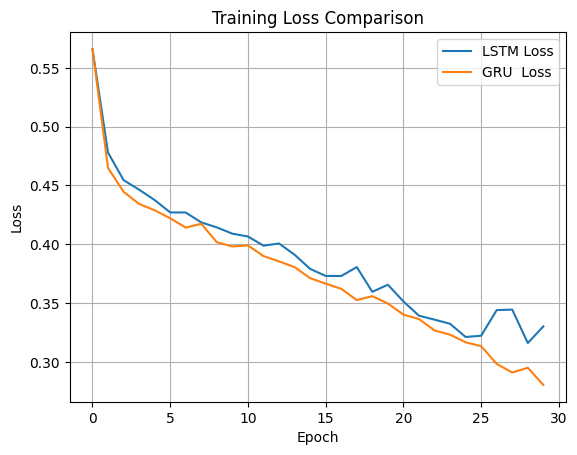

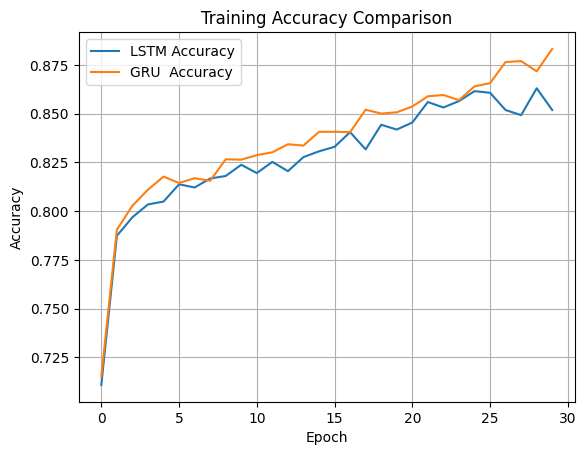

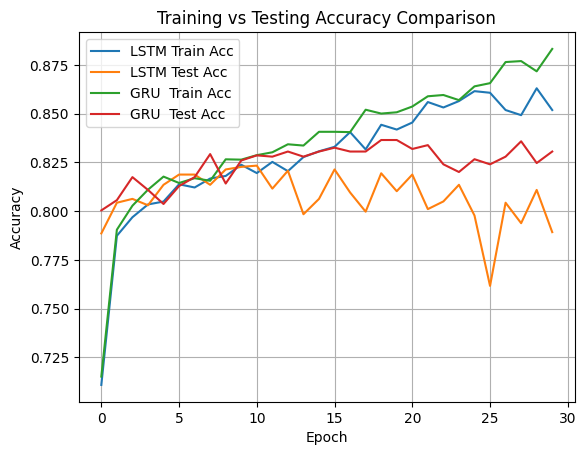

In [20]:
plt.figure()
plt.plot(train_losses_lstm, label="LSTM Loss")
plt.plot(train_losses_gru, label="GRU  Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(train_accuracies_lstm, label="LSTM Accuracy")
plt.plot(train_accuracies_gru,  label="GRU  Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(train_accuracies_lstm, label="LSTM Train Acc")
plt.plot(lstm_test_accs, label="LSTM Test Acc")
plt.plot(train_accuracies_gru, label="GRU  Train Acc")
plt.plot(gru_test_accs, label="GRU  Test Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Analyze Training Speed and Memory usage

In [21]:
avg_time_lstm = sum(train_times_lstm) / len(train_times_lstm)
avg_time_gru  = sum(train_times_gru)  / len(train_times_gru)
print("\n[Training Speed]")
print(f"LSTM - Average epoch time: {avg_time_lstm:.2f} s")
print(f"GRU  - Average epoch time: {avg_time_gru:.2f} s")

# Calculate average GPU Memory (peak usage)
avg_mem_lstm = sum(train_memory_usage_lstm) / len(train_memory_usage_lstm)
avg_mem_gru  = sum(train_memory_usage_gru)  / len(train_memory_usage_gru)
print("\n[GPU Memory Usage (Peak)]")
print(f"LSTM - Average GPU usage: {avg_mem_lstm/1024**2:.2f} MB")
print(f"GRU  - Average GPU usage: {avg_mem_gru/1024**2:.2f} MB")


[Training Speed]
LSTM - Average epoch time: 27.16 s
GRU  - Average epoch time: 27.16 s

[GPU Memory Usage (Peak)]
LSTM - Average GPU usage: 1435.24 MB
GRU  - Average GPU usage: 1445.26 MB


### Inference

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(model, test_loader, model_name="Model"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for input_ids, attention_mask,token_type_ids, labels in tqdm(test_loader, desc=f"Testing {model_name}"):
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)  # If using token_type_ids, uncomment this line
            outputs = model(input_ids, attention_mask,token_type_ids)  # (batch,)

            preds = (outputs >= 0.5).long()
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.tolist())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)

    print(f"\n[{model_name} Test Results]")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")

# Evaluate LSTM
evaluate_model(model_lstm, test_loader, model_name="LSTM")

# Evaluate GRU
evaluate_model(model_gru, test_loader, model_name="GRU")


Testing LSTM: 100%|██████████| 48/48 [00:06<00:00,  7.92it/s]



[LSTM Test Results]
Accuracy : 0.7892
Precision: 0.7216
Recall   : 0.8228


Testing GRU: 100%|██████████| 48/48 [00:06<00:00,  7.96it/s]


[GRU Test Results]
Accuracy : 0.8306
Precision: 0.8587
Recall   : 0.7211
